# BT4222 Project



In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import pylab 
import scipy.stats as stats
import seaborn as sns
import random

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, plot_roc_curve,roc_curve
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from sklearn.model_selection import GridSearchCV

import keras
import tensorflow as tf

random.seed(1234)
np.random.seed(1234)
#note: it appears that despite setting the seed, whenever colab's runtime changes, it produces different results

In [2]:
application_data = pd.read_csv("./application_record.csv", encoding = 'utf-8') 
application_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [3]:
credit_data = pd.read_csv("./credit_record.csv", encoding = 'utf-8') 
credit_data.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


## **Exploratory Data Analysis**

In [4]:
application_data.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [5]:
credit_data.describe()

,ID,MONTHS_BALANCE
count,1.048575e+06,1.048575e+06
mean,5.068286e+06,-1.913700e+01
std,4.615058e+04,1.402350e+01
min,5.001711e+06,-6.000000e+01
25%,5.023644e+06,-2.900000e+01
50%,5.062104e+06,-1.700000e+01
75%,5.113856e+06,-7.000000e+00
max,5.150487e+06,0.000000e+00


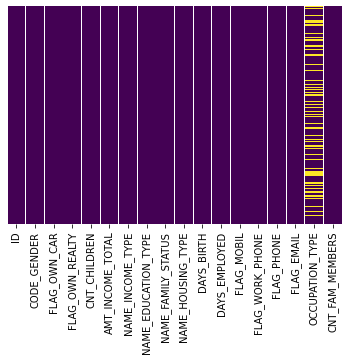

In [6]:
# to check missing values
sns.heatmap(application_data.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')
plt.show()

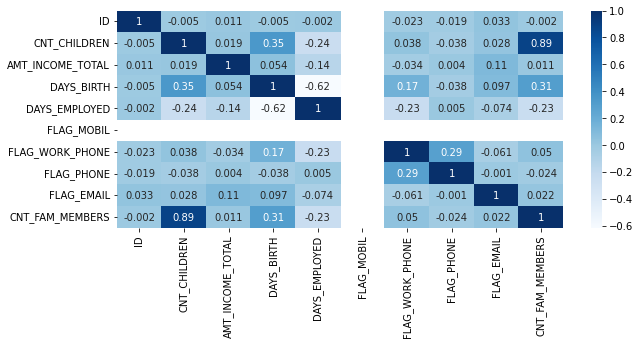

In [7]:
plt.figure(figsize=(10,4))
sns.heatmap(application_data.corr().round(3),cmap='Blues',annot=True) 
plt.show()

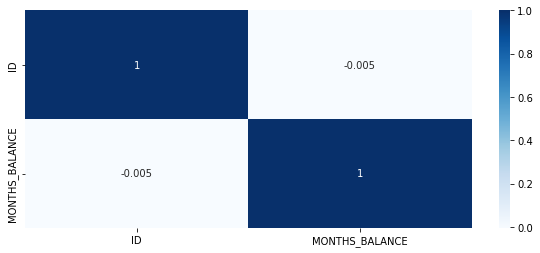

In [8]:
plt.figure(figsize=(10,4))
sns.heatmap(credit_data.corr().round(3),cmap='Blues',annot=True) 
plt.show()

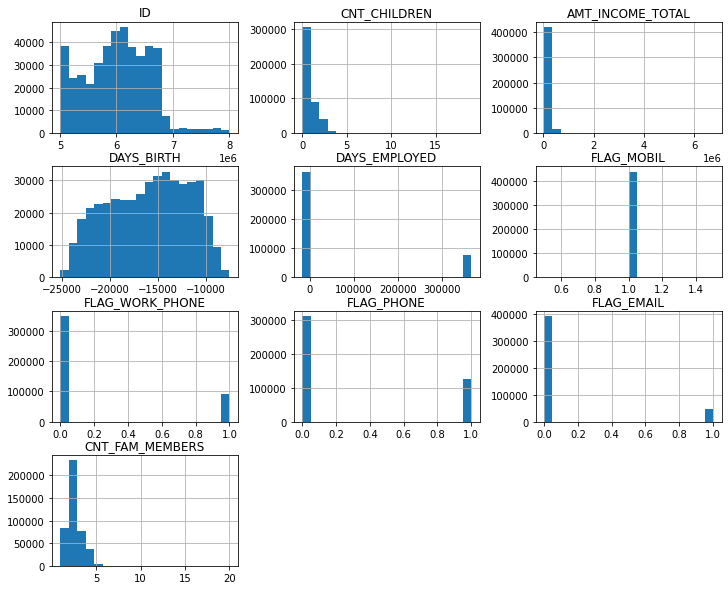

In [9]:
# distribution
application_data.hist(figsize=(12,10),bins=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


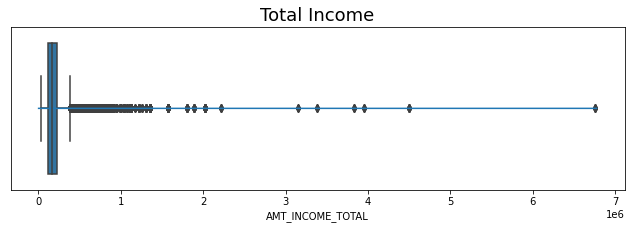

In [10]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(11,3))
ax.set_title("Total Income",fontsize=18)
sns.boxplot(x="AMT_INCOME_TOTAL", data=application_data, ax=ax)
ax.set(yticks=[])
sns.distplot(application_data["AMT_INCOME_TOTAL"],kde=True)

## **Feature Engineering**

In [11]:
# fill in missing values for occupation type
application_data['OCCUPATION_TYPE'].fillna(value='Others', inplace=True)

In [12]:
# features under application record (convert to positive value)

# 1. Birthday to Age
application_data["DAYS_BIRTH"] = -(application_data["DAYS_BIRTH"])
application_data["AGE"] = (application_data["DAYS_BIRTH"]) // 365

# 2. Days since employment
application_data["DAYS_EMPLOYED"] = -(application_data["DAYS_EMPLOYED"]) 

In [13]:
application_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,12005,4542,1,1,0,0,Others,2.0,32
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,12005,4542,1,1,0,0,Others,2.0,32
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,21474,1134,1,0,0,0,Security staff,2.0,58
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1,0,1,1,Sales staff,1.0,52
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1,0,1,1,Sales staff,1.0,52


In [14]:
# convert months_balance in credit_data to positive value
credit_data["MONTHS_BALANCE"] = credit_data["MONTHS_BALANCE"] *-1
start_month = credit_data.groupby(['ID'])['MONTHS_BALANCE'].min()
start_month.head()

ID
5001711    0
5001712    0
5001713    0
5001714    0
5001715    0
Name: MONTHS_BALANCE, dtype: int64

In [15]:
application_data = application_data.merge(start_month, on='ID')
application_data.rename(columns={'MONTHS_BALANCE':'START_MONTH'}, inplace=True)
application_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,START_MONTH
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,12005,4542,1,1,0,0,Others,2.0,32,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,12005,4542,1,1,0,0,Others,2.0,32,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,21474,1134,1,0,0,0,Security staff,2.0,58,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1,0,1,1,Sales staff,1.0,52,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1,0,1,1,Sales staff,1.0,52,22


In [16]:
#risk users with > 60 days overdue or unemployed (income under 25th percentile)
overdue = ['2','3','4','5']

credit_data['RISK'] = 0
for i in overdue:
    credit_data['RISK'][credit_data['STATUS'] == i] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
risk_list = credit_data.groupby(['ID'])['RISK'].max()
risk_list.head()

ID
5001711    0
5001712    0
5001713    0
5001714    0
5001715    0
Name: RISK, dtype: int64

In [18]:
#> 60 days overdue
data = application_data.merge(risk_list, on='ID')
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,START_MONTH,RISK
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,4542,1,1,0,0,Others,2.0,32,0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,4542,1,1,0,0,Others,2.0,32,0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,1134,1,0,0,0,Security staff,2.0,58,0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,3051,1,0,1,1,Sales staff,1.0,52,0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,3051,1,0,1,1,Sales staff,1.0,52,22,0


In [19]:
#unemployed (income under $100,000)
threshold = 100000
data.loc[(data['DAYS_EMPLOYED'] < 0) & (data['AMT_INCOME_TOTAL'] < threshold), 'RISK'] = 1
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,START_MONTH,RISK
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,4542,1,1,0,0,Others,2.0,32,0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,4542,1,1,0,0,Others,2.0,32,0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,1134,1,0,0,0,Security staff,2.0,58,0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,3051,1,0,1,1,Sales staff,1.0,52,0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,3051,1,0,1,1,Sales staff,1.0,52,22,0


In [20]:
data['TARGET'] = 0
data['TARGET'][data['RISK'] == 0] = 1
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,START_MONTH,RISK,TARGET
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,Others,2.0,32,0,0,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,Others,2.0,32,0,0,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,1,0,0,0,Security staff,2.0,58,0,0,1
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,0,1,1,Sales staff,1.0,52,0,0,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,0,1,1,Sales staff,1.0,52,22,0,1


In [21]:
data['TARGET'].value_counts()

1    34174
0     2283
Name: TARGET, dtype: int64

In [22]:
data['TARGET'].value_counts(normalize = True)

1    0.937378
0    0.062622
Name: TARGET, dtype: float64

In [23]:
#extract risk and target list
risk_list = data['RISK']
target = data['TARGET']
data = data.drop(['RISK', 'TARGET'], axis = 1)

In [24]:
#convert to binary
data['CODE_GENDER'] = data['CODE_GENDER'].replace(['F','M'],[0,1])
data['FLAG_OWN_CAR'] = data['FLAG_OWN_CAR'].replace(['N','Y'],[0,1])
data['FLAG_OWN_REALTY'] = data['FLAG_OWN_REALTY'].replace(['N','Y'],[0,1])

In [25]:
#one hot encoding
process = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']

for i in process:
    one_hot = pd.get_dummies(data[i])
    data = data.drop(i, axis = 1)
    data = data.join(one_hot)

In [26]:
#remove irrelevant columns
data = data.drop(columns=['ID', 'DAYS_BIRTH'])

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CODE_GENDER                    36457 non-null  int64  
 1   FLAG_OWN_CAR                   36457 non-null  int64  
 2   FLAG_OWN_REALTY                36457 non-null  int64  
 3   CNT_CHILDREN                   36457 non-null  int64  
 4   AMT_INCOME_TOTAL               36457 non-null  float64
 5   DAYS_EMPLOYED                  36457 non-null  int64  
 6   FLAG_MOBIL                     36457 non-null  int64  
 7   FLAG_WORK_PHONE                36457 non-null  int64  
 8   FLAG_PHONE                     36457 non-null  int64  
 9   FLAG_EMAIL                     36457 non-null  int64  
 10  CNT_FAM_MEMBERS                36457 non-null  float64
 11  AGE                            36457 non-null  int64  
 12  START_MONTH                    36457 non-null 

In [28]:
X_data = data
Y_data = target #0 = reject, 1 = approve

X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size = 0.2, random_state = 1234)

In [29]:
#standard scaling
scale_list = ['AMT_INCOME_TOTAL', 'DAYS_EMPLOYED', 'START_MONTH', 'CNT_FAM_MEMBERS']

std_scaler = StandardScaler()
X_train[scale_list] = std_scaler.fit_transform(X_train[scale_list])

std_scaler = StandardScaler()
X_test[scale_list] = std_scaler.fit_transform(X_test[scale_list])

In [30]:
#feature engineering complete
X_train.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,...,Low-skill Laborers,Managers,Medicine staff,Others,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
20784,0,1,0,0,-0.507387,0.478846,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
18675,0,1,1,0,-0.197821,0.452385,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24633,1,0,0,1,0.155969,0.438565,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
29328,0,0,1,0,-0.507387,-2.226958,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
21683,1,1,1,0,2.146036,0.448741,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0


## **Models**

### **Decision Tree**

In [31]:
%%time
#decision tree (Chantelle)
model_tree = DecisionTreeClassifier(max_depth=5,
                               min_samples_split=5,
                               random_state=1234)
model_tree.fit(X_train, y_train)
y_predict_tree = model_tree.predict(X_train)

print('Accuracy Score:', (accuracy_score(y_train, y_predict_tree)))
print('Precision Score:', (precision_score(y_train, y_predict_tree)))
print('Recall Score:', (recall_score(y_train, y_predict_tree)))
print('F1 Score:', (f1_score(y_train, y_predict_tree)))

y_score_tree = model_tree.predict_proba(X_train)
print('ROC Score:', (roc_auc_score(y_train, y_score_tree[:,1])))

Accuracy Score: 0.9848448482770444
Precision Score: 0.9842292874374392
Recall Score: 0.9998536888693808
F1 Score: 0.9919799680650312
ROC Score: 0.9215959235122908
CPU times: user 246 ms, sys: 14.1 ms, total: 260 ms
Wall time: 471 ms


[[ 1388   438]
 [    4 27335]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


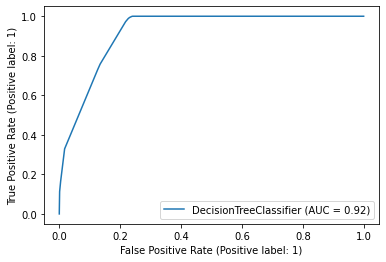

In [32]:
print(confusion_matrix(y_train, y_predict_tree))
print(plot_roc_curve(model_tree, X_train, y_train))

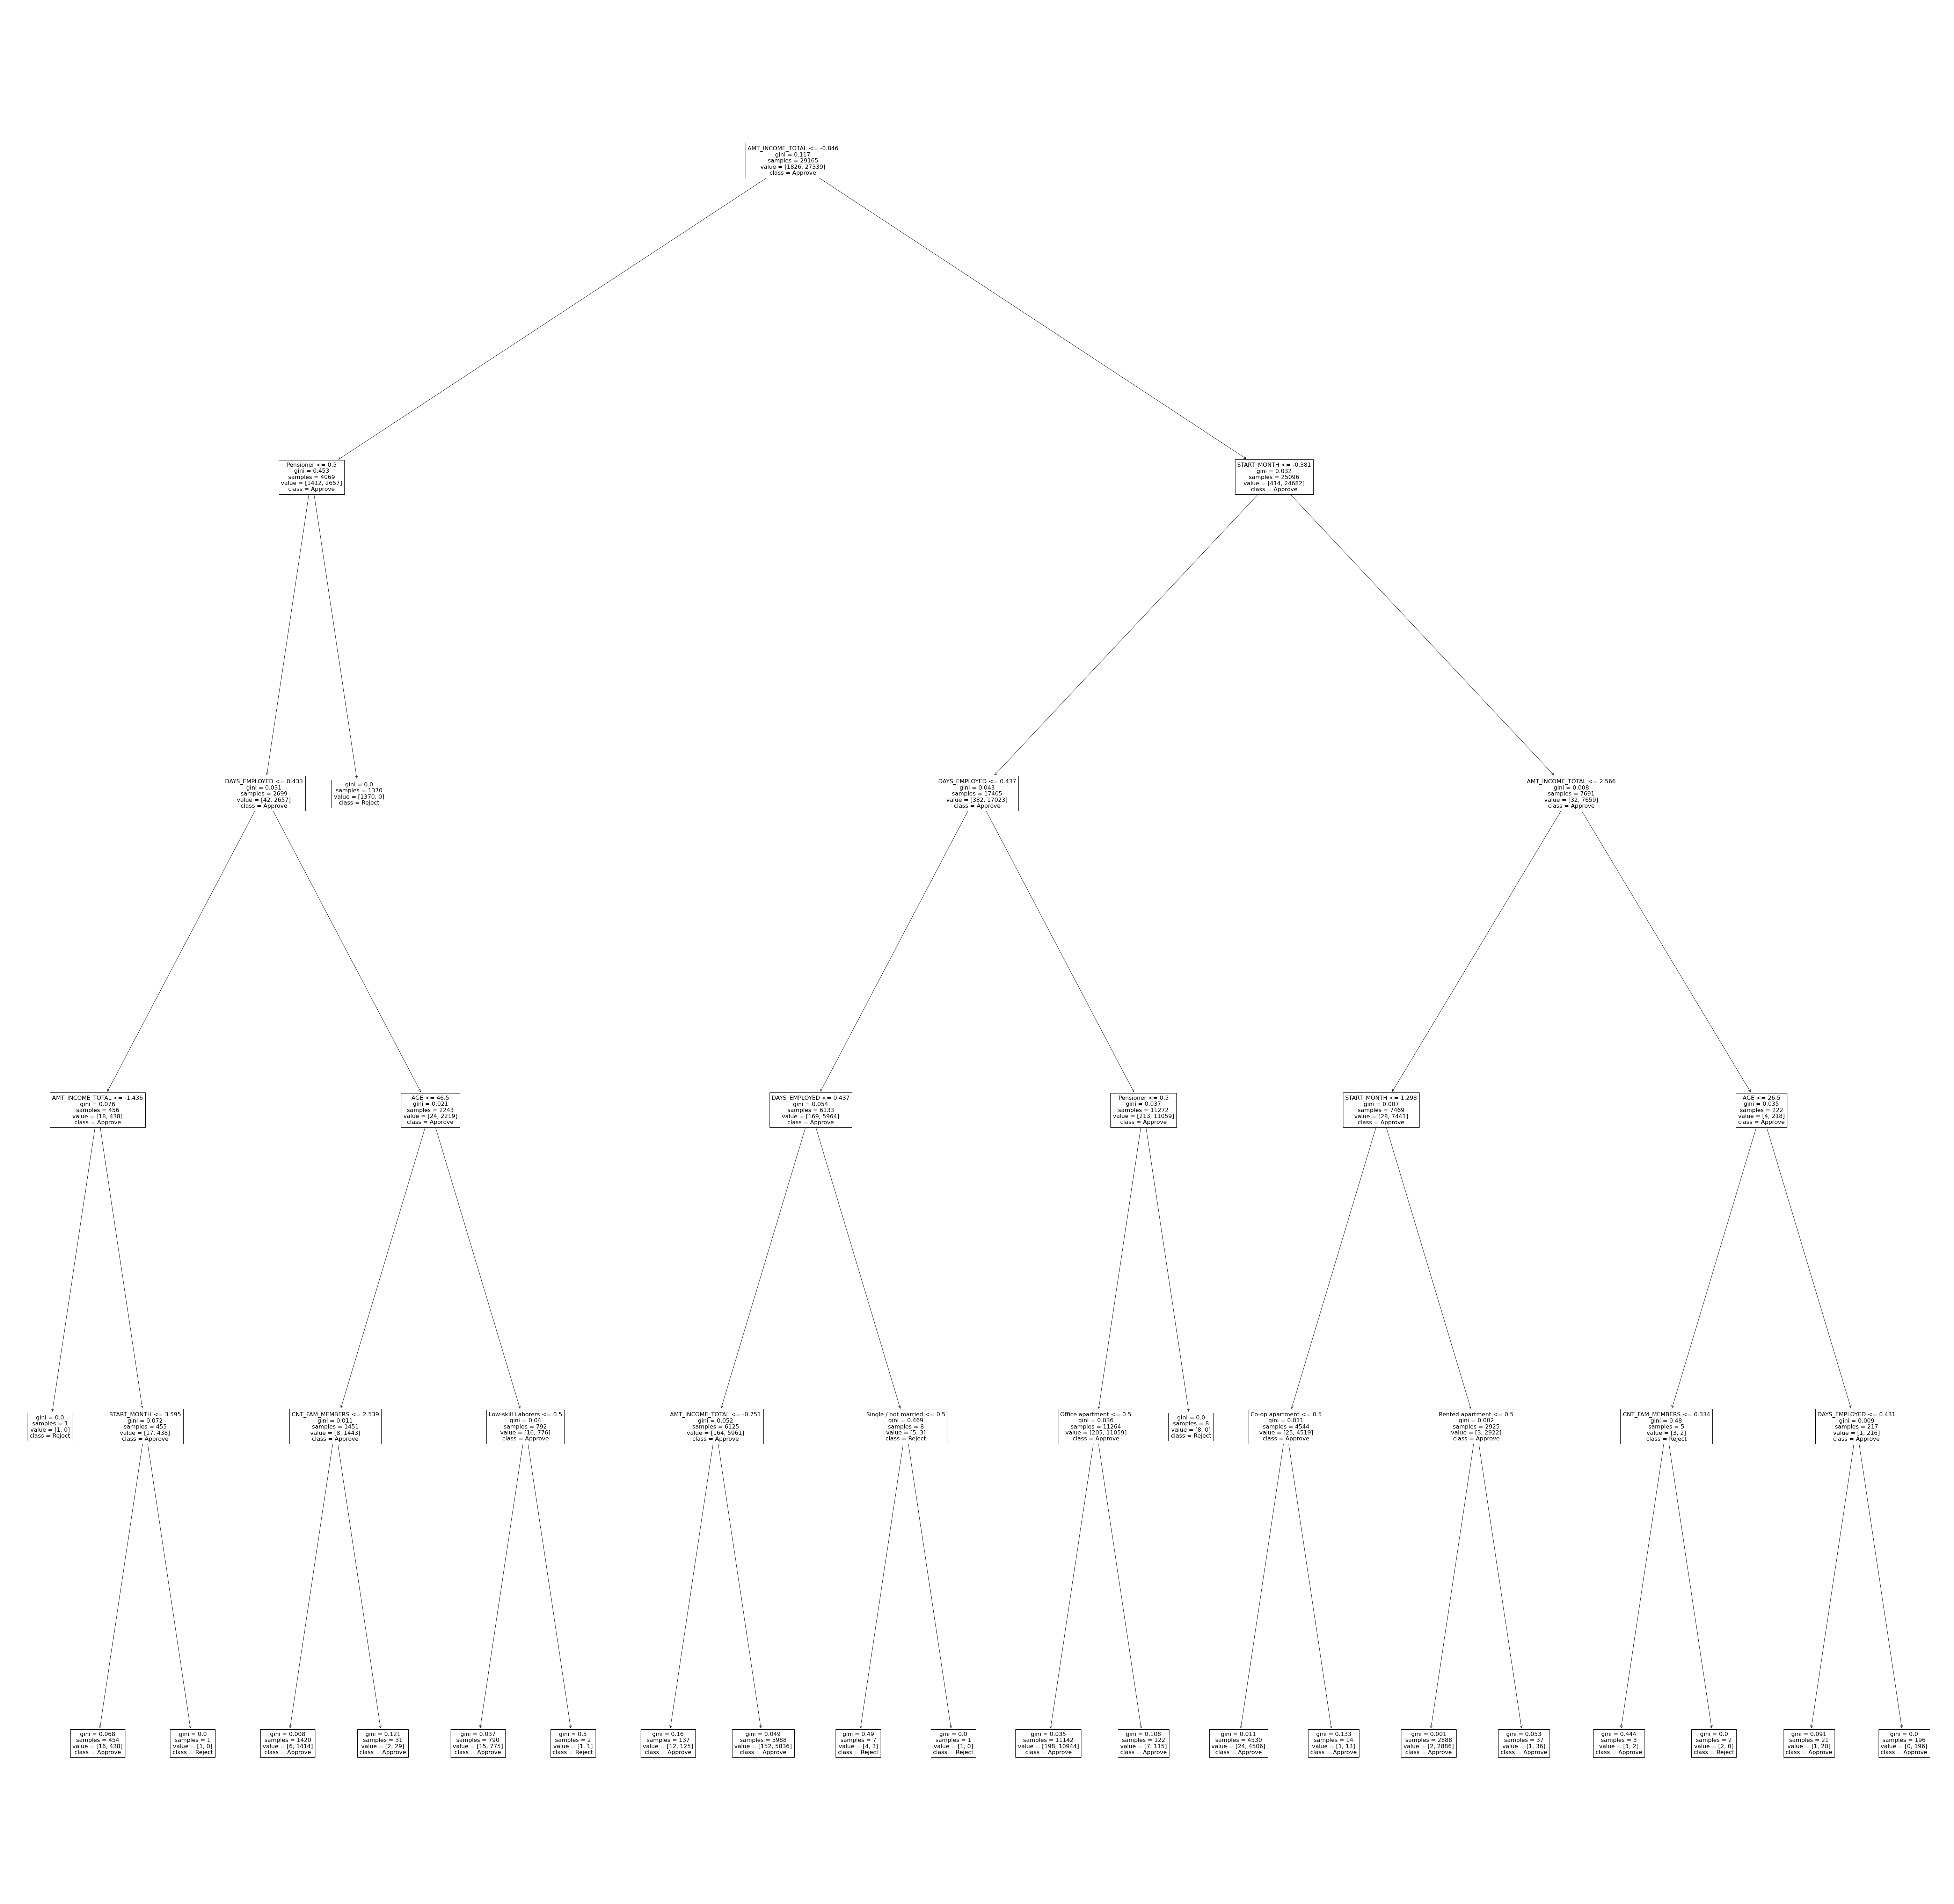

In [33]:
fig = plt.figure(figsize=(100,100))
_ = tree.plot_tree(model_tree, feature_names = data.columns, class_names = ['Reject', 'Approve'])

In [34]:
#decision tree - tuning parameters (Chantelle)
parameters = {'max_depth': [3, 4, 5, 6, 7],
              'min_samples_split': [3, 4, 5, 6, 7],
              'random_state': [1234]}

In [35]:
%%time
model_tune = DecisionTreeClassifier()
tree_tune = GridSearchCV(model_tune,
                        parameters,
                        cv = 3,
                        scoring = 'roc_auc',
                        verbose = 3)

model_tree = tree_tune.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV 1/3] END max_depth=3, min_samples_split=3, random_state=1234;, score=0.906 total time=   0.1s
[CV 2/3] END max_depth=3, min_samples_split=3, random_state=1234;, score=0.898 total time=   0.1s
[CV 3/3] END max_depth=3, min_samples_split=3, random_state=1234;, score=0.907 total time=   0.1s
[CV 1/3] END max_depth=3, min_samples_split=4, random_state=1234;, score=0.906 total time=   0.1s
[CV 2/3] END max_depth=3, min_samples_split=4, random_state=1234;, score=0.898 total time=   0.1s
[CV 3/3] END max_depth=3, min_samples_split=4, random_state=1234;, score=0.907 total time=   0.1s
[CV 1/3] END max_depth=3, min_samples_split=5, random_state=1234;, score=0.906 total time=   0.1s
[CV 2/3] END max_depth=3, min_samples_split=5, random_state=1234;, score=0.898 total time=   0.1s
[CV 3/3] END max_depth=3, min_samples_split=5, random_state=1234;, score=0.907 total time=   0.1s
[CV 1/3] END max_depth=3, min_samples_split=6, random_sta

In [36]:
print(model_tree.best_params_)

y_predict_tree = model_tree.predict(X_train)

print('Accuracy Score:', (accuracy_score(y_train, y_predict_tree)))
print('Precision Score:', (precision_score(y_train, y_predict_tree)))
print('Recall Score:', (recall_score(y_train, y_predict_tree)))
print('F1 Score:', (f1_score(y_train, y_predict_tree)))

y_score_tree = model_tree.predict_proba(X_train)
print('ROC Score:', (roc_auc_score(y_train, y_score_tree[:,1])))

{'max_depth': 7, 'min_samples_split': 3, 'random_state': 1234}
Accuracy Score: 0.9852905880336019
Precision Score: 0.9847600518806745
Recall Score: 0.9997805333040711
F1 Score: 0.9922134494963246
ROC Score: 0.9316676640422409


[[ 1403   423]
 [    6 27333]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


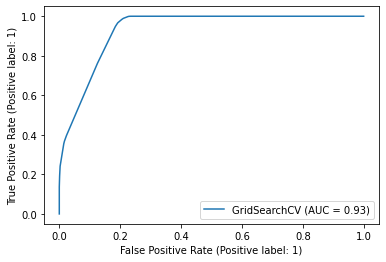

In [37]:
print(confusion_matrix(y_train, y_predict_tree))
print(plot_roc_curve(model_tree, X_train, y_train))

### **Random Forest**

In [38]:
%%time
#random forest (Chantelle)
model_rf = RandomForestClassifier(n_estimators=250,
                              max_depth=5,
                              min_samples_leaf=5,
                              random_state = 1234)
model_rf.fit(X_train, y_train)
y_predict_rf = model_rf.predict(X_train)

print('Accuracy Score:', (accuracy_score(y_train, y_predict_rf)))
print('Precision Score:', (precision_score(y_train, y_predict_rf)))
print('Recall Score:', (recall_score(y_train, y_predict_rf)))
print('F1 Score:', (f1_score(y_train, y_predict_rf)))

y_score_rf = model_rf.predict_proba(X_train)
print('ROC Score:', (roc_auc_score(y_train, y_score_rf[:,1])))

Accuracy Score: 0.9842962454997428
Precision Score: 0.9835234018059503
Recall Score: 1.0
F1 Score: 0.9916932675565874
ROC Score: 0.9302856708800026
CPU times: user 4.41 s, sys: 23.9 ms, total: 4.44 s
Wall time: 4.49 s


[[ 1368   458]
 [    0 27339]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


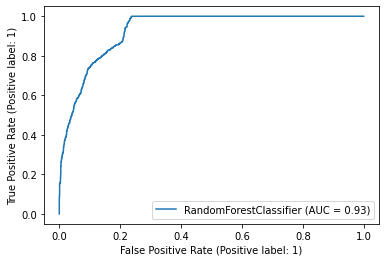

In [39]:
print(confusion_matrix(y_train,y_predict_rf))
print(plot_roc_curve(model_rf, X_train, y_train))

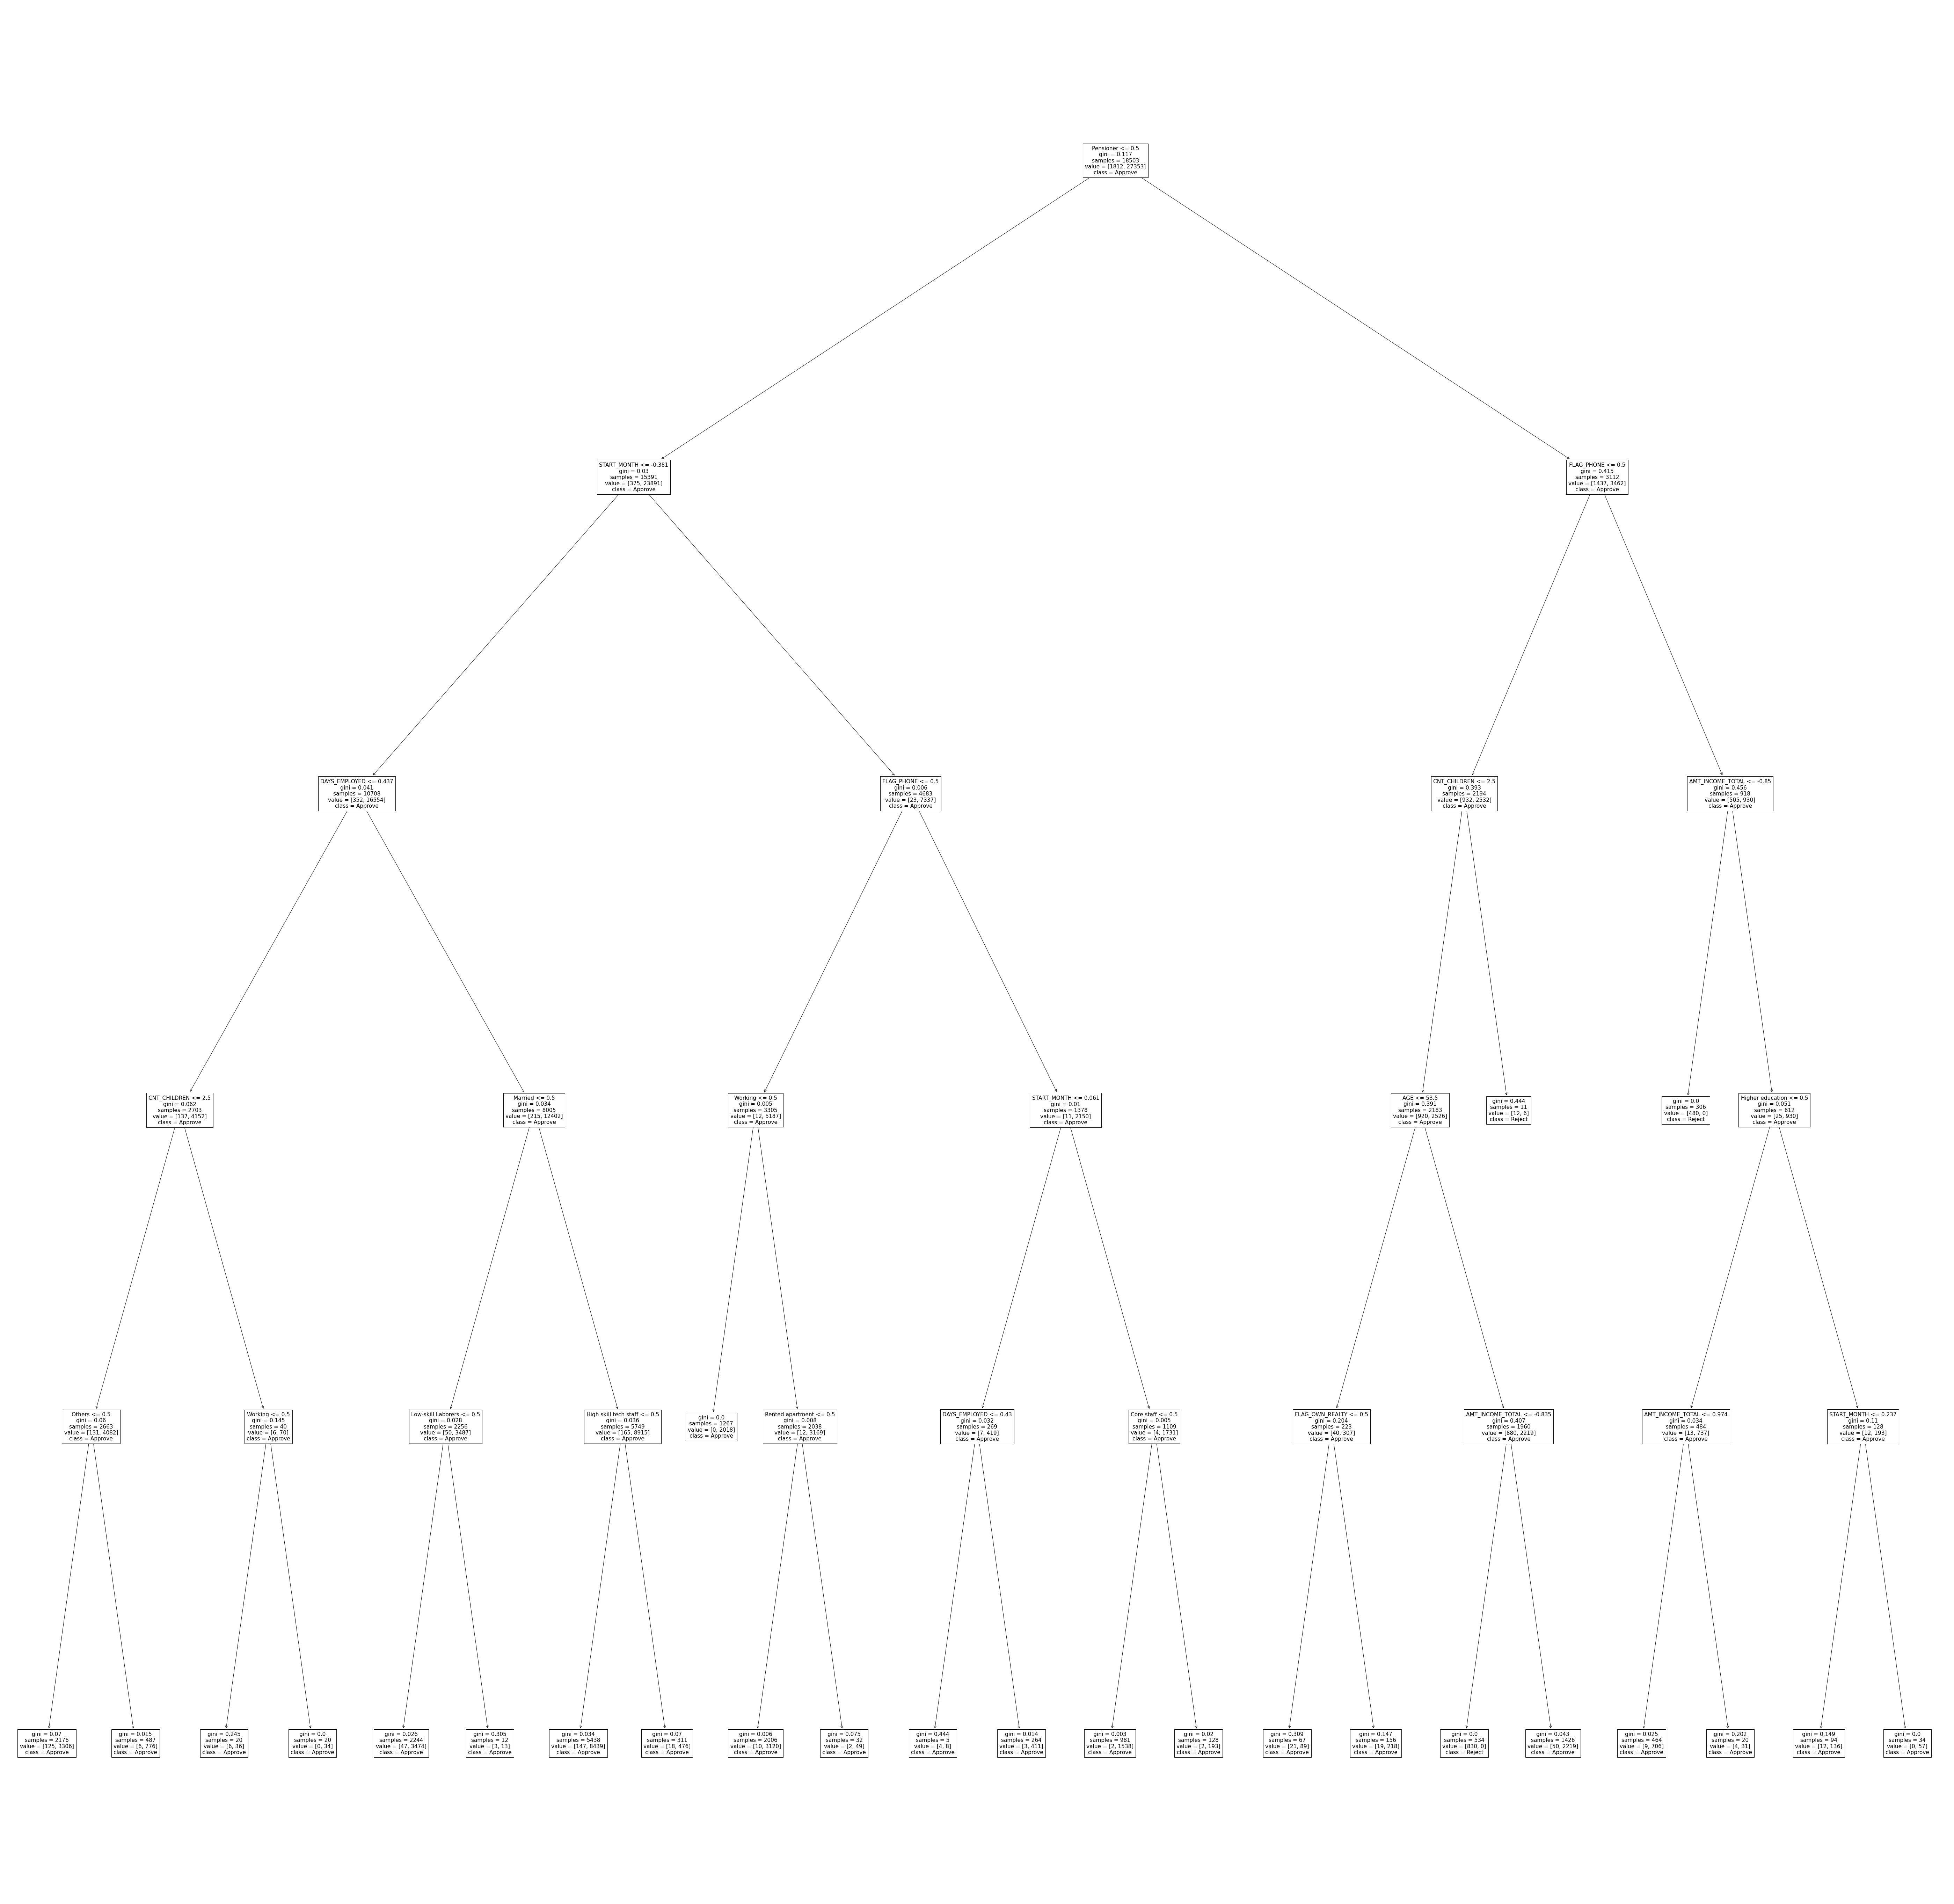

In [40]:
estimator = model_rf.estimators_[5]

fig = plt.figure(figsize=(100,100))
_ = tree.plot_tree(estimator, feature_names = data.columns, class_names = ['Reject', 'Approve'])

In [41]:
#random forest - tuning parameters (Chantelle)
parameters = {'n_estimators': [150, 250, 350],
              'max_depth': [3, 4, 5, 6, 7],
              'min_samples_leaf': [3, 4, 5, 6, 7],
              'random_state': [1234]}

In [42]:
%%time
model_tune = RandomForestClassifier()
rf_tune = GridSearchCV(model_tune,
                        parameters,
                        cv = 3,
                        scoring = 'roc_auc',
                        verbose = 3)

model_rf = rf_tune.fit(X_train, y_train)

Fitting 3 folds for each of 75 candidates, totalling 225 fits
[CV 1/3] END max_depth=3, min_samples_leaf=3, n_estimators=150, random_state=1234;, score=0.881 total time=   1.2s
[CV 2/3] END max_depth=3, min_samples_leaf=3, n_estimators=150, random_state=1234;, score=0.888 total time=   1.2s
[CV 3/3] END max_depth=3, min_samples_leaf=3, n_estimators=150, random_state=1234;, score=0.896 total time=   1.1s
[CV 1/3] END max_depth=3, min_samples_leaf=3, n_estimators=250, random_state=1234;, score=0.884 total time=   1.9s
[CV 2/3] END max_depth=3, min_samples_leaf=3, n_estimators=250, random_state=1234;, score=0.888 total time=   1.9s
[CV 3/3] END max_depth=3, min_samples_leaf=3, n_estimators=250, random_state=1234;, score=0.896 total time=   1.8s
[CV 1/3] END max_depth=3, min_samples_leaf=3, n_estimators=350, random_state=1234;, score=0.883 total time=   2.5s
[CV 2/3] END max_depth=3, min_samples_leaf=3, n_estimators=350, random_state=1234;, score=0.888 total time=   2.7s
[CV 3/3] END max_d

In [43]:
print(model_rf.best_params_)

y_predict_rf = model_rf.predict(X_train)

print('Accuracy Score:', (accuracy_score(y_train, y_predict_rf)))
print('Precision Score:', (precision_score(y_train, y_predict_rf)))
print('Recall Score:', (recall_score(y_train, y_predict_rf)))
print('F1 Score:', (f1_score(y_train, y_predict_rf)))

y_score_rf = model_rf.predict_proba(X_train)
print('ROC Score:', (roc_auc_score(y_train, y_score_rf[:,1])))

{'max_depth': 7, 'min_samples_leaf': 3, 'n_estimators': 350, 'random_state': 1234}
Accuracy Score: 0.9843648208469056
Precision Score: 0.9835941716135995
Recall Score: 1.0
F1 Score: 0.9917292414843836
ROC Score: 0.9546304488125982


[[ 1370   456]
 [    0 27339]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


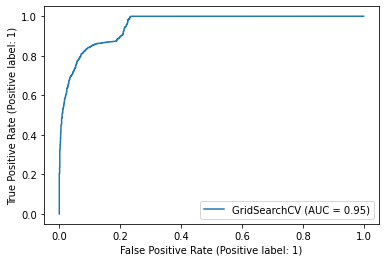

In [44]:
print(confusion_matrix(y_train,y_predict_rf))
print(plot_roc_curve(model_rf, X_train, y_train))

In [45]:
#chosen model - Random Forest (Tuned)
print(model_rf.best_params_)

y_predict_test = model_rf.predict(X_test)

print('Accuracy Score:', (accuracy_score(y_test, y_predict_test)))
print('Precision Score:', (precision_score(y_test, y_predict_test)))
print('Recall Score:', (recall_score(y_test, y_predict_test)))
print('F1 Score:', (f1_score(y_test, y_predict_test)))

y_score_test = model_rf.predict_proba(X_test)
print('ROC Score:', (roc_auc_score(y_test, y_score_test[:,1])))

{'max_depth': 7, 'min_samples_leaf': 3, 'n_estimators': 350, 'random_state': 1234}
Accuracy Score: 0.9827207899067472
Precision Score: 0.9818991524206292
Recall Score: 1.0
F1 Score: 0.990866917947231
ROC Score: 0.9176032744321846


[[ 331  126]
 [   0 6835]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


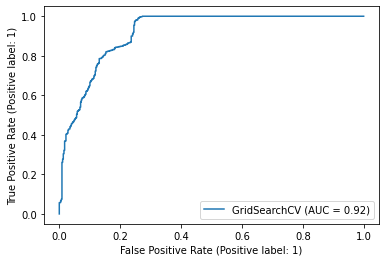

In [46]:
print(confusion_matrix(y_test,y_predict_test))
print(plot_roc_curve(model_rf, X_test, y_test))

In [47]:
rf_importances = model_rf.best_estimator_.feature_importances_
# rf_std = np.std([tree.feature_importances_ for tree in model_rf.best_estimator_.estimators_], axis=0)

feature_names = [f"{i}" for i in list(X_test.columns)]
forest_importances = pd.Series(rf_importances, index=feature_names)
most_important = forest_importances[forest_importances > 0.05]
most_important = most_important.sort_values(ascending=False)

Text(0, 0.5, 'Mean decrease in impurity')

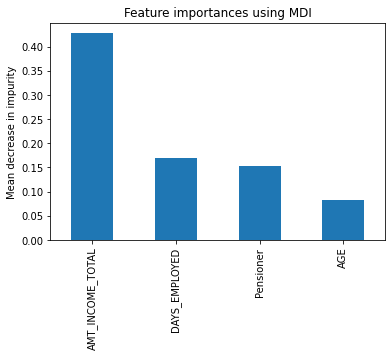

In [48]:
fig, ax = plt.subplots()
most_important.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

### **Logistic Regression**

In [49]:
%%time
logreg = LogisticRegression(penalty="none", max_iter=5000, random_state=1234)
logreg.fit(X_train, y_train)
y_predict_logreg = logreg.predict(X_train)

print('Accuracy Score:', (accuracy_score(y_train, y_predict_logreg)))
print('Precision Score:', (precision_score(y_train, y_predict_logreg)))
print('Recall Score:', (recall_score(y_train, y_predict_logreg)))
print('F1 Score:', (f1_score(y_train, y_predict_logreg)))

y_score_logreg = logreg.predict_proba(X_train)
print('ROC Score:', (roc_auc_score(y_train, y_score_logreg[:,1])))

Accuracy Score: 0.9729470255443168
Precision Score: 0.9726217601822843
Recall Score: 0.9992684443469037
F1 Score: 0.9857650603496492
ROC Score: 0.8925361972815696
CPU times: user 15.7 s, sys: 6.4 s, total: 22.1 s
Wall time: 14.2 s


[[ 1057   769]
 [   20 27319]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


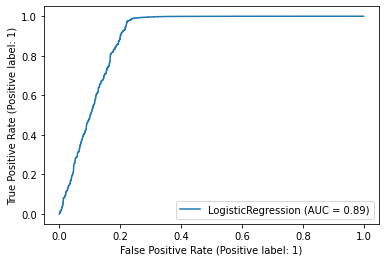

In [50]:
print(confusion_matrix(y_train, y_predict_logreg))
print(plot_roc_curve(logreg, X_train, y_train))

In [51]:
# logistic Regression - tuning parameters 
lg_parameters = {'solver': ['liblinear', 'saga'],
                 'penalty': ["l1", "l2"],
                 'C': [0.1, 0.5, 1, 10, 100],
                 'random_state': [1234]}

In [52]:
%%time
logreg_tune = LogisticRegression(max_iter=5000)
lg_tune = GridSearchCV(logreg_tune,
                        lg_parameters,
                        cv = 3,
                        scoring = 'roc_auc',
                        verbose = 3)

model_lg = lg_tune.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END C=0.1, penalty=l1, random_state=1234, solver=liblinear;, score=0.870 total time=   0.8s
[CV 2/3] END C=0.1, penalty=l1, random_state=1234, solver=liblinear;, score=0.886 total time=   0.5s
[CV 3/3] END C=0.1, penalty=l1, random_state=1234, solver=liblinear;, score=0.883 total time=   0.6s
[CV 1/3] END C=0.1, penalty=l1, random_state=1234, solver=saga;, score=0.869 total time= 1.2min
[CV 2/3] END C=0.1, penalty=l1, random_state=1234, solver=saga;, score=0.885 total time=  49.3s
[CV 3/3] END C=0.1, penalty=l1, random_state=1234, solver=saga;, score=0.885 total time= 1.2min
[CV 1/3] END C=0.1, penalty=l2, random_state=1234, solver=liblinear;, score=0.870 total time=   0.2s
[CV 2/3] END C=0.1, penalty=l2, random_state=1234, solver=liblinear;, score=0.889 total time=   0.2s
[CV 3/3] END C=0.1, penalty=l2, random_state=1234, solver=liblinear;, score=0.884 total time=   0.2s
[CV 1/3] END C=0.1, penalty=l2, random_state=

KeyboardInterrupt: ignored

In [53]:
print(model_lg.best_params_)

y_predict_lg = model_lg.predict(X_train)

print('Accuracy Score:', (accuracy_score(y_train, y_predict_lg)))
print('Precision Score:', (precision_score(y_train, y_predict_lg)))
print('Recall Score:', (recall_score(y_train, y_predict_lg)))
print('F1 Score:', (f1_score(y_train, y_predict_lg)))

y_score_lg = model_lg.predict_proba(X_train)
print('ROC Score:', (roc_auc_score(y_train, y_score_lg[:,1])))

NameError: ignored

In [ ]:
print(confusion_matrix(y_train,y_predict_lg))
print(plot_roc_curve(model_lg, X_train, y_train))

### **Support Vector Machine**

In [ ]:
%%time
model_svm0 = SVC(probability=True, class_weight={1: 1000}).fit(X_train, y_train)

y_predict_svm0 = model_svm0.predict(X_train)

print('Accuracy Score:', (accuracy_score(y_train, y_predict_svm0)))
print('Precision Score:', (precision_score(y_train, y_predict_svm0)))
print('Recall Score:', (recall_score(y_train, y_predict_svm0)))
print('F1 Score:', (f1_score(y_train, y_predict_svm0)))

y_score_svm0 = model_svm0.predict_proba(X_train)
print('ROC Score:', (roc_auc_score(y_train, y_score_svm0[:,1])))

In [ ]:
print(confusion_matrix(y_train,y_predict_svm0))
print(plot_roc_curve(model_svm0, X_train, y_train))

In [ ]:
# support vector machine - tuning parameters 
svm_parameters = {'C': np.logspace(-1, 1, 3),
                  'kernel': ('linear', 'poly','rbf'),
                  'degree': [2,3]}

In [ ]:
%%time
model_svm = GridSearchCV(estimator=SVC(probability=True),
                         param_grid= svm_parameters,
                         cv = 3,
                         scoring='roc_auc',
                         verbose = 3).fit(X_train, y_train)
pd.DataFrame(model_svm.cv_results_)

In [ ]:
print(model_svm.best_params_)

y_predict_svm = model_svm.predict(X_train)

print('Accuracy Score:', (accuracy_score(y_train, y_predict_svm)))
print('Precision Score:', (precision_score(y_train, y_predict_svm)))
print('Recall Score:', (recall_score(y_train, y_predict_svm)))
print('F1 Score:', (f1_score(y_train, y_predict_svm)))

y_score_svm = model_svm.predict_proba(X_train)
print('ROC Score:', (roc_auc_score(y_train, y_score_svm[:,1])))

In [ ]:
print(confusion_matrix(y_train,y_predict_svm))
print(plot_roc_curve(model_svm, X_train, y_train))

### **Naive Bayes**

In [60]:
%%time
# drop all columns for which values for all rows are the same as it does not contribute to prediction and 
# produces NaN values while scaling to ensure all values are non-negative(MultinomialNB does not accept negative column values)
nunique = X_train.nunique()
cols_to_drop = nunique[nunique == 1].index
print(cols_to_drop)

Index(['FLAG_MOBIL'], dtype='object')
CPU times: user 17.6 ms, sys: 6 ms, total: 23.6 ms
Wall time: 27.2 ms


In [61]:
X_train_unique = X_train.drop(cols_to_drop, axis=1)

normalized_X_train=(X_train_unique-X_train_unique.min())/(X_train_unique.max()-X_train_unique.min())
print(normalized_X_train)

       CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
20784          0.0           1.0              0.0      0.000000   
18675          0.0           1.0              1.0      0.000000   
24633          1.0           0.0              0.0      0.052632   
29328          0.0           0.0              1.0      0.000000   
21683          1.0           1.0              1.0      0.000000   
...            ...           ...              ...           ...   
32399          0.0           1.0              0.0      0.000000   
17048          0.0           1.0              1.0      0.000000   
23924          0.0           0.0              0.0      0.000000   
34086          1.0           1.0              0.0      0.000000   
27439          0.0           0.0              0.0      0.000000   

       AMT_INCOME_TOTAL  DAYS_EMPLOYED  FLAG_WORK_PHONE  FLAG_PHONE  \
20784          0.069767       0.976635              1.0         1.0   
18675          0.090116       0.967084              0

In [62]:
# fit the model without any optimisation
nb = MultinomialNB()
nb.fit(normalized_X_train, y_train)

nb_predict_train = nb.predict(normalized_X_train)

In [63]:
# train set

# accuracy score
nb_train_acc = accuracy_score(y_train, nb_predict_train)

# precision
nb_train_precision = precision_score(y_train, nb_predict_train)

# recall
nb_train_recall = recall_score(y_train, nb_predict_train)

# roc_auc
nb_train_roc_auc = roc_auc_score(y_train, nb_predict_train)

# f1 score
nb_train_f1 = f1_score(y_train, nb_predict_train)

# confusion matrix
nb_train_cfm = confusion_matrix(y_train, nb_predict_train)

In [64]:
# scores
print(nb_train_acc)
print(nb_train_precision)
print(nb_train_recall)
print(nb_train_roc_auc)
print(nb_train_f1)
print(nb_train_cfm)

0.8727584433396194
0.983585755218993
0.8789275394125609
0.8296609219516256
0.9283161737719485
[[ 1425   401]
 [ 3310 24029]]


In [65]:
# fit with highly correlated features removed to optimise Naive Bayes model, as it assumes that input variables are assumed to be independent
nb_corr_matrix = normalized_X_train.corr().abs()

nb_corr_pairs = (nb_corr_matrix.where(np.triu(np.ones(nb_corr_matrix.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))
print(nb_corr_pairs)

DAYS_EMPLOYED     Pensioner                        0.997920
CNT_CHILDREN      CNT_FAM_MEMBERS                  0.888293
Higher education  Secondary / secondary special    0.887159
DAYS_EMPLOYED     Others                           0.669982
Pensioner         Others                           0.669029
                                                     ...   
With parents      Medicine staff                   0.000191
AMT_INCOME_TOTAL  Married                          0.000190
CNT_FAM_MEMBERS   House / apartment                0.000181
CNT_CHILDREN      IT staff                         0.000150
FLAG_PHONE        Municipal apartment              0.000071
Length: 1326, dtype: float64


In [66]:
highly_correlated_pairs = nb_corr_pairs[nb_corr_pairs > 0.90]
highly_correlated_pairs

DAYS_EMPLOYED  Pensioner    0.99792
dtype: float64

In [67]:
nb_highly_correlated_cols = ['DAYS_EMPLOYED','Pensioner']
X_train_2 = normalized_X_train.drop(nb_highly_correlated_cols, axis=1)
X_train_2

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,AGE,...,Low-skill Laborers,Managers,Medicine staff,Others,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
20784,0.0,1.0,0.0,0.000000,0.069767,1.0,1.0,0.0,0.052632,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18675,0.0,1.0,1.0,0.000000,0.090116,0.0,0.0,0.0,0.052632,0.270833,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24633,1.0,0.0,0.0,0.052632,0.113372,1.0,0.0,0.0,0.105263,0.312500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29328,0.0,0.0,1.0,0.000000,0.069767,0.0,0.0,0.0,0.000000,0.625000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
21683,1.0,1.0,1.0,0.000000,0.244186,1.0,1.0,1.0,0.052632,0.166667,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32399,0.0,1.0,0.0,0.000000,0.122093,1.0,0.0,0.0,0.052632,0.583333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17048,0.0,1.0,1.0,0.000000,0.186047,0.0,1.0,0.0,0.000000,0.104167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23924,0.0,0.0,0.0,0.000000,0.055233,1.0,0.0,0.0,0.052632,0.375000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34086,1.0,1.0,0.0,0.000000,0.069767,1.0,0.0,0.0,0.052632,0.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [68]:
nb2 = MultinomialNB()
nb2.fit(X_train_2, y_train)
nb2_predict_train = nb2.predict(X_train_2)

In [69]:
# train set after dropping highly correlated columns

# accuracy score
nb2_train_acc = accuracy_score(y_train, nb2_predict_train)

# precision
nb2_train_precision = precision_score(y_train, nb2_predict_train)

# recall
nb2_train_recall = recall_score(y_train, nb2_predict_train)

# roc_auc
nb2_train_roc_auc = roc_auc_score(y_train, nb2_predict_train)

# f1 score
nb2_train_f1 = f1_score(y_train, nb2_predict_train)

# confusion matrix
nb2_train_cfm = confusion_matrix(y_train, nb2_predict_train)

In [70]:
# scores
print(nb2_train_acc)
print(nb2_train_precision)
print(nb2_train_recall)
print(nb2_train_roc_auc)
print(nb2_train_f1)
print(nb2_train_cfm)

0.929161666380936
0.9458105485976362
0.9806137751929478
0.5697154308604389
0.9628977803318727
[[  290  1536]
 [  530 26809]]


# Grid Search for Hyperparameter Tuning

In [71]:
# defining parameter range 
nb_param_grid = {'alpha': [1, 0, 0.1, 0.01, 0.001, 0.0001, 0.00001],  
              'fit_prior': [False, True], 
              }  
   
nb_tuned_param = GridSearchCV(MultinomialNB(), nb_param_grid) 
   
# fitting the model for grid search 
nb_tuned_param.fit(X_train_2, y_train) 
 
# print best parameter after tuning 
print(nb_tuned_param.best_params_) 

nb4_predict_train = nb_tuned_param.predict(X_train_2)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr

{'alpha': 1, 'fit_prior': True}


In [72]:
# train set after tuning via grid search
# train set after tuning via grid search

# accuracy score
nb4_train_acc = accuracy_score(y_train, nb4_predict_train)

# precision
nb4_train_precision = precision_score(y_train, nb4_predict_train)

# recall
nb4_train_recall = recall_score(y_train, nb4_predict_train)

# roc_auc
nb4_train_roc_auc = roc_auc_score(y_train, nb4_predict_train)

# f1 score
nb4_train_f1 = f1_score(y_train, nb4_predict_train)

# confusion matrix
nb4_train_cfm = confusion_matrix(y_train, nb4_predict_train)
print(nb4_train_cfm)

[[  290  1536]
 [  530 26809]]


In [73]:
# scores
print('Accuracy score: ', nb4_train_acc)
print('Precision score: ', nb4_train_precision)
print('Recall score: ', nb4_train_recall)
print('ROC score: ', nb4_train_roc_auc)
print('F1 score: ', nb4_train_f1)

Accuracy score:  0.929161666380936
Precision score:  0.9458105485976362
Recall score:  0.9806137751929478
ROC score:  0.5697154308604389
F1 score:  0.9628977803318727


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


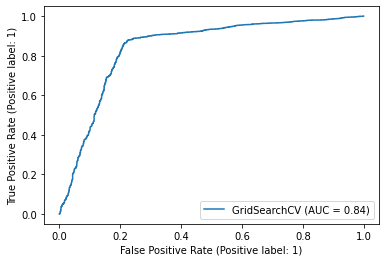

In [74]:
# roc_auc curve
plot_roc_curve(nb_tuned_param, X_train_2, y_train)

# Testing

In [75]:
# Normalisation of test set
nunique = X_test.nunique()
cols_to_drop = nunique[nunique == 1].index

X_test_unique = X_test.drop(cols_to_drop, axis=1)

normalized_X_test = (X_test_unique-X_test_unique.min())/(X_test_unique.max()-X_test_unique.min())

# dropping highly correlated variables in test set
nb_highly_correlated_cols = ['DAYS_EMPLOYED','Pensioner']
X_test_2 = normalized_X_test.drop(nb_highly_correlated_cols, axis=1)

In [76]:
nb_predict_test = nb_tuned_param.predict(X_test_2)

In [77]:
# accuracy score
nb_test_acc = accuracy_score(y_test, nb_predict_test)

# precision
nb_test_precision = precision_score(y_test, nb_predict_test)

# recall
nb_test_recall = recall_score(y_test, nb_predict_test)

# roc_auc
nb_test_roc_auc = roc_auc_score(y_test, nb_predict_test)

# f1 score
nb_test_f1 = f1_score(y_test, nb_predict_test)

# confusion matrix
nb_test_cfm = confusion_matrix(y_test, nb_predict_test)

In [78]:
# scores
print(nb_test_acc)
print(nb_test_precision)
print(nb_test_recall)
print(nb_test_roc_auc)
print(nb_test_f1)
print(nb_test_cfm)

0.9260833790455294
0.9445072013555493
0.9786393562545721
0.5593415599653604
0.961270388733204
[[  64  393]
 [ 146 6689]]


## Neural Network

In [ ]:
X_train.shape

In [54]:
nnmodel = keras.models.Sequential() 
nnmodel.add(keras.layers.Flatten(input_shape=[ 53]))
nnmodel.add(keras.layers.Dense(200, activation='ReLU'))
nnmodel.add(keras.layers.Dense(200, activation='ReLU'))
nnmodel.add(keras.layers.Dense(100, activation='ReLU'))
nnmodel.add(keras.layers.Dense(100, activation='ReLU'))
nnmodel.add(keras.layers.Dense(1, activation='sigmoid'))

nnmodel.compile(metrics=['AUC'],
              loss='mse',
              optimizer='sgd')

In [55]:
new_y_train = y_train.copy()

In [56]:
# np.place(new_y_train, new_y_train == 0, [2])
# np.place(new_y_train, new_y_train == 1, [0])
# np.place(new_y_train, new_y_train == 2, [1])
new_y_train = new_y_train.replace(0,2)
new_y_train = new_y_train.replace(1,0)
new_y_train = new_y_train.replace(2,0)

In [79]:
history = nnmodel.fit(X_train,y_train, epochs=15)

Epoch 1/15
912/912 [==============================] - 7s 7ms/step - loss: 0.1464 - auc: 0.3132
Epoch 2/15
912/912 [==============================] - 3s 4ms/step - loss: 0.0624 - auc: 0.2664
Epoch 3/15
912/912 [==============================] - 3s 3ms/step - loss: 0.0624 - auc: 0.2645
Epoch 4/15
912/912 [==============================] - 3s 3ms/step - loss: 0.0624 - auc: 0.2524
Epoch 5/15
912/912 [==============================] - 3s 3ms/step - loss: 0.0623 - auc: 0.2570
Epoch 6/15
912/912 [==============================] - 3s 3ms/step - loss: 0.0623 - auc: 0.2372
Epoch 7/15
912/912 [==============================] - 3s 3ms/step - loss: 0.0623 - auc: 0.2440
Epoch 8/15
912/912 [==============================] - 2s 2ms/step - loss: 0.0623 - auc: 0.2333
Epoch 9/15
912/912 [==============================] - 3s 3ms/step - loss: 0.0622 - auc: 0.2490
Epoch 10/15
912/912 [==============================] - 2s 3ms/step - loss: 0.0620 - auc: 0.2718
Epoch 11/15
912/912 [============================

912/912 [==============================] - 1s 2ms/step
Accuracy Score: 0.9021086919252529
Precision Score: 0.9835295047002133
Recall Score: 0.9108233658875599
F1 Score: 0.9457811876863474


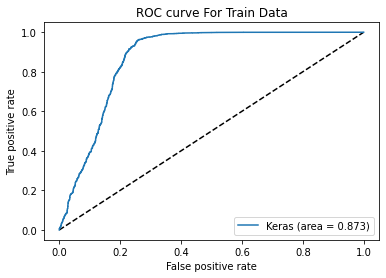

In [80]:
y_pred_keras_train = nnmodel.predict(X_train).ravel()
fpr_nn_train, tpr_nn_train, thresholds_nn_train = roc_curve(y_train, y_pred_keras_train)
auc_nn_train = auc(fpr_nn_train, tpr_nn_train)

y_predict_nn_round_train = y_pred_keras_train.round(0)

print('Accuracy Score:', (accuracy_score(y_train, y_predict_nn_round_train)))
print('Precision Score:', (precision_score(y_train, y_predict_nn_round_train)))
print('Recall Score:', (recall_score(y_train, y_predict_nn_round_train)))
print('F1 Score:', (f1_score(y_train, y_predict_nn_round_train)))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_nn_train, tpr_nn_train, label='Keras (area = {:.3f})'.format(auc_nn_train))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve For Train Data')
plt.legend(loc='best')
plt.show()

228/228 [==============================] - 0s 2ms/step - loss: 0.0597 - auc: 0.8572
Model loss: 0.059746
Model accuracy: 0.857216
228/228 [==============================] - 0s 1ms/step
Accuracy Score: 0.8972846955567746
Precision Score: 0.9820975918884665
Recall Score: 0.906949524506218
F1 Score: 0.943028827869476
228/228 [==============================] - 0s 1ms/step


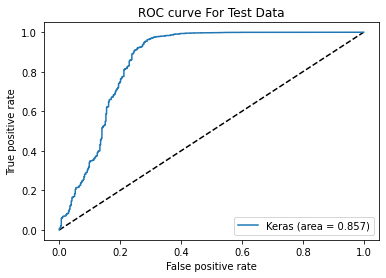

In [81]:
result = nnmodel.evaluate(X_test, y_test)
print('Model loss: %f' % result[0])
print('Model accuracy: %f' % result[1])

y_predict_nn_test = nnmodel.predict(X_test)
y_predict_nn_round = y_predict_nn_test.round(0)

print('Accuracy Score:', (accuracy_score(y_test, y_predict_nn_round)))
print('Precision Score:', (precision_score(y_test, y_predict_nn_round)))
print('Recall Score:', (recall_score(y_test, y_predict_nn_round)))
print('F1 Score:', (f1_score(y_test, y_predict_nn_round)))

y_pred_keras = nnmodel.predict(X_test).ravel()
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_pred_keras)
auc_nn = auc(fpr_nn, tpr_nn)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_nn, tpr_nn, label='Keras (area = {:.3f})'.format(auc_nn))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve For Test Data')
plt.legend(loc='best')
plt.show()